In [1]:
import pandas as pd

In [3]:
data=pd.read_csv("C:/Users/soumy/OneDrive/Documents/DelayedFlights.csv")
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003,1955,2211.0,2225,WN,...,4.0,8,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754,735,1002.0,1000,WN,...,5.0,10,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628,620,804.0,750,WN,...,3.0,17,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829,1755,1959.0,1925,WN,...,3.0,10,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940,1915,2121.0,2110,WN,...,4.0,10,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,3505042,2008,6,19,4,1551,1535,1923.0,1915,AA,...,5.0,20,0,N,0,NaN,NaN,NaN,NaN,NaN
1048571,3505043,2008,6,20,5,1555,1535,1927.0,1915,AA,...,6.0,14,0,N,0,NaN,NaN,NaN,NaN,NaN
1048572,3505044,2008,6,21,6,1555,1535,1917.0,1915,AA,...,5.0,13,0,N,0,NaN,NaN,NaN,NaN,NaN
1048573,3505045,2008,6,22,7,1607,1535,1941.0,1915,AA,...,5.0,12,0,N,0,1.0,0.0,0.0,0.0,25.0


In [4]:
data.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

1.Which month have seen the most number of cancellation due to bad weather?

In [72]:
data.groupby('CancellationCode'=='B')['Month'].value_counts()

KeyError: False

2.Top 10 route(origin and dest) that has seen maximum diversions?

In [32]:
data[data['Diverted']==1].groupby(['Origin','Dest']).size().nlargest()

Origin  Dest
DAL     HOU     23
ORD     LGA     22
DFW     LGA     21
BUR     JFK     18
ATL     LGA     17
dtype: int64

3.Top 5 visited destination.

In [36]:
data['Dest'].value_counts().head()

ORD    62719
ATL    50558
DFW    38458
DEN    34218
LAX    32549
Name: Dest, dtype: int64

In [ ]:
# 4.which month has the highest cancellations

In [70]:
data.groupby('Cancelled')['Month'].value_counts().sort_values(ascending=False)

Cancelled  Month
0          3        200842
           2        189534
           1        183527
           6        166336
           4        155264
           5        153072
Name: Month, dtype: int64

In [ ]:
# 5.whixh day of the week has most cancellations

In [73]:
data.groupby('Cancelled')['DayOfWeek'].value_counts().sort_values(ascending=False)

Cancelled  DayOfWeek
0          5            183898
           4            159975
           1            153583
           7            150317
           3            141259
           2            139595
           6            119948
Name: DayOfWeek, dtype: int64

6.which destination has most visited in which day of the week

In [75]:
data.groupby('Dest')['DayOfWeek'].value_counts().sort_values(ascending=False).head(5)

Dest  DayOfWeek
ORD   5            11013
      1             9864
      2             9431
ATL   5             8804
ORD   7             8616
Name: DayOfWeek, dtype: int64

In [84]:
#7
data.groupby('Origin')['ArrDelay'].mean().idxmax()

'CMX'

In [87]:
import seaborn as sns
import matplotlib as plt

<Axes: >

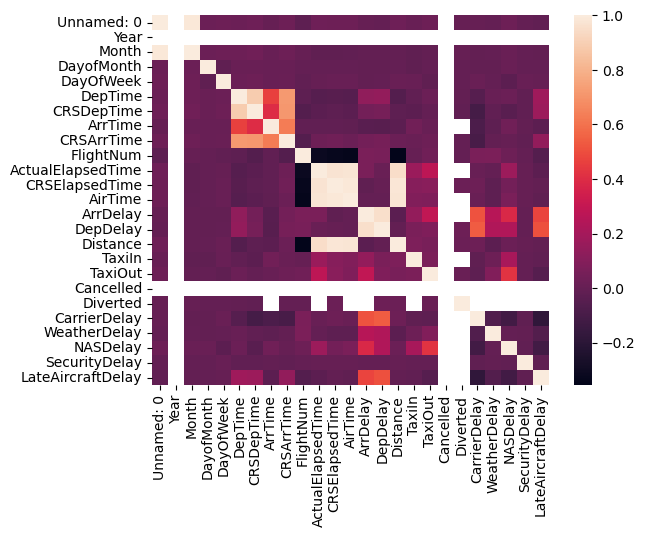

In [94]:
#8
sns.heatmap(data.corr(numeric_only=True))

In [ ]:
# 9.which flight has delayed mostly

In [99]:
data.groupby('FlightNum')['ArrDelay'].value_counts().sort_values(ascending=False).head(5)

FlightNum  ArrDelay
720        8.0         27
44         10.0        26
442        12.0        24
720        7.0         24
24         11.0        24
Name: ArrDelay, dtype: int64

In [ ]:
# 10. which destination has delayed arraival time

In [101]:
data.groupby('Dest')['ArrDelay'].value_counts().sort_values(ascending=False).head(5)

Dest  ArrDelay
ATL   10.0        947
      13.0        932
      11.0        921
      8.0         898
      6.0         896
Name: ArrDelay, dtype: int64

In [ ]:
# 11.which destination has long distance

In [102]:
data.groupby('Dest')['Distance'].value_counts().sort_values(ascending=False).head(5)

Dest  Distance
LAX   337         3596
SFO   337         2609
LGA   733         2494
LAX   236         2117
ORD   733         2044
Name: Distance, dtype: int64

In [ ]:
# 12.which week of the data has taxi availability

In [105]:
data.groupby('DayOfWeek')['TaxiIn'].value_counts().sort_values(ascending=True).head(5)

DayOfWeek  TaxiIn
7          200.0     1
6          75.0      1
           76.0      1
           77.0      1
           81.0      1
Name: TaxiIn, dtype: int64

In [ ]:
# 13.which month has highly repeated

In [108]:
import matplotlib.pyplot as mplt

<Axes: xlabel='Month', ylabel='count'>

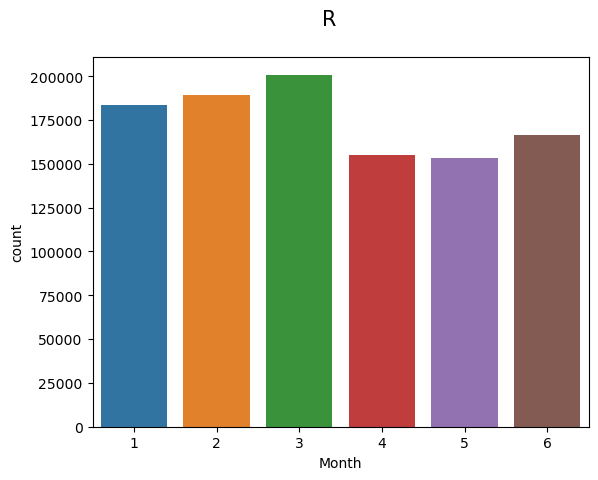

In [111]:
fig=mplt.figure()
fig.suptitle("Months",fontsize=15)
sns.countplot(x=data['Month'])